In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import median

# Plot Anaylisis

## One Time Preprocessing

In [4]:
if not os.path.exists('results_datasets'):
    os.mkdir('results_datasets')

if not os.path.exists('seed_separated_datasets'):
    os.mkdir('seed_separated_datasets')

if not os.path.exists('preprocessed_datasets'):
    os.mkdir('preprocessed_datasets')

General (non serve)

In [5]:
results_path = './plotData/results/'
progress_logs_path = './plotData/progress_logs/'


pbc_results = glob.glob(os.path.join(results_path, "*pbc*.csv"))
pharynx_results = glob.glob(os.path.join(results_path, "*pharynx*.csv"))
poker_results = glob.glob(os.path.join(results_path, "*poker*.csv"))

lst = []
for file in pbc_results:
    df = pd.read_csv(file)
    lst.append(df)
pbc_dataframe = pd.concat(lst, axis=0, ignore_index=True)

lst = []
for file in pharynx_results:
    df = pd.read_csv(file)
    lst.append(df)
pharynx_dataframe = pd.concat(lst, axis=0, ignore_index=True)

lst = []
for file in poker_results:
    df = pd.read_csv(file)
    lst.append(df)
poker_dataframe = pd.concat(lst, axis=0, ignore_index=True)

pbc_dataframe.to_csv('./results_datasets/pbc_results.csv', index=False)
pharynx_dataframe.to_csv('./results_datasets/pharynx_results.csv', index=False)
poker_dataframe.to_csv('./results_datasets/poker_results.csv', index=False)

For each seed

In [6]:
file = open("new_random_seeds.txt", "r")
new_random_seeds = file.read()
file.close()

new_random_seeds = new_random_seeds.replace("\n", "").replace(" ", "").split(",")

results_path = './plotData/results/'
progress_logs_path = './plotData/progress_logs/'

for seed in new_random_seeds:
    pbc_results = glob.glob(os.path.join(results_path, "*pbc*"+seed+"*.csv"))
    pharynx_results = glob.glob(os.path.join(results_path, "*pharynx*"+seed+"*.csv"))
    poker_results = glob.glob(os.path.join(results_path, "*poker*"+seed+"*.csv"))

    lst = []
    for file in pbc_results:
        df = pd.read_csv(file)
        df.insert(0, 'seed', int(seed))
        lst.append(df)
    pbc_dataframe = pd.concat(lst, axis=0, ignore_index=True)

    lst = []
    for file in pharynx_results:
        df = pd.read_csv(file)
        df.insert(0, 'seed', int(seed))
        lst.append(df)
    pharynx_dataframe = pd.concat(lst, axis=0, ignore_index=True)

    lst = []
    for file in poker_results:
        df = pd.read_csv(file)
        df.insert(0, 'seed', int(seed))
        lst.append(df)
    poker_dataframe = pd.concat(lst, axis=0, ignore_index=True)

    pbc_dataframe.to_csv('./seed_separated_datasets/pbc_results_seed_'+seed+'.csv', index=False)
    pharynx_dataframe.to_csv('./seed_separated_datasets/pharynx_results_seed_'+seed+'.csv', index=False)
    poker_dataframe.to_csv('./seed_separated_datasets/poker_results_seed_'+seed+'.csv', index=False)

In [7]:
datasets_path = './seed_separated_datasets/'

pbc_datasets = glob.glob(os.path.join(datasets_path, "*pbc*.csv"))
pharynx_datasets = glob.glob(os.path.join(datasets_path, "*pharynx*.csv"))
poker_datasets = glob.glob(os.path.join(datasets_path, "*poker*.csv"))

lst = []
for file in pbc_datasets:
    df = pd.read_csv(file)
    lst.append(df)
pbc_dataframe = pd.concat(lst, axis=0, ignore_index=True)

lst = []
for file in pharynx_datasets:
    df = pd.read_csv(file)
    lst.append(df)
pharynx_dataframe = pd.concat(lst, axis=0, ignore_index=True)

lst = []
for file in poker_datasets:
    df = pd.read_csv(file)
    lst.append(df)
poker_dataframe = pd.concat(lst, axis=0, ignore_index=True)

pbc_dataframe.to_csv('./preprocessed_datasets/pbc_results.csv', index=False)
pharynx_dataframe.to_csv('./preprocessed_datasets/pharynx_results.csv', index=False)
poker_dataframe.to_csv('./preprocessed_datasets/poker_results.csv', index=False)

## Actual Analysis

In [2]:
pbc_dataframe = pd.read_csv('./preprocessed_datasets/pbc_results.csv')
pharynx_dataframe = pd.read_csv('./preprocessed_datasets/pharynx_results.csv')
poker_dataframe = pd.read_csv('./preprocessed_datasets/poker_results.csv')

In [3]:
pbc_dataframe.drop(columns=['n_nodes', 'evaluations'], inplace=True)
pharynx_dataframe.drop(columns=['n_nodes', 'evaluations'], inplace=True)
poker_dataframe.drop(columns=['n_nodes', 'evaluations'], inplace=True)

In [4]:
pbc_dataframe = pbc_dataframe.sort_values(by=['training_set_dimension','popsize','generations'], ascending=True)
pharynx_dataframe = pharynx_dataframe.sort_values(by=['training_set_dimension','popsize','generations'], ascending=True)
poker_dataframe = poker_dataframe.sort_values(by=['training_set_dimension','popsize','generations'], ascending=True)

In [9]:
pbc_dataframe

,seed,training_set_dimension,popsize,generations,test_rmse,train_rmse,time_taken
148,406090,10,10,10,1222.708,473.192,0.000939
1089,648630,10,10,10,2710.448,819.623,0.016766
2035,55414,10,10,10,1428.750,528.709,0.001589
2980,246723,10,10,10,1281.664,391.362,0.000886
3930,47391,10,10,10,1236.266,541.207,0.001465
...,...,...,...,...,...,...,...
10188,739190,500000,10000,100,905.770,906.064,195153.804426
11135,192969,500000,10000,100,908.751,907.979,249384.410743
12081,601195,500000,10000,100,911.491,911.726,172118.389251
13029,943369,500000,10000,100,911.027,911.220,181067.377628


This piece of code retrieves all n-tuple of training_set_dimension, popsize, generations and makes the median from all the seeds with the same n-tuple
Then it creates a new dataframe without seeds where the test_rmse is the median calculated before

In [10]:
lst = []
already_iterated = []

for training_set_dimension, popsize, generations in zip(pbc_dataframe.training_set_dimension, pbc_dataframe.popsize, pbc_dataframe.generations):
    if [training_set_dimension, popsize, generations] in already_iterated:
        continue
    already_iterated.append([training_set_dimension,popsize,generations])
    rows = pbc_dataframe.loc[(pbc_dataframe['training_set_dimension'] == training_set_dimension) & (pbc_dataframe['popsize'] == popsize) & (pbc_dataframe['generations'] == generations)]
    lst.append([training_set_dimension, popsize, generations, median(rows['test_rmse'].values)])

median_pbc_dataframe = pd.DataFrame(lst, columns=['training_set_dimension', 'popsize', 'generations', 'median_test_rmse'])

In [11]:
median_pbc_dataframe

,training_set_dimension,popsize,generations,median_test_rmse
0,10,10,10,1392.0390
1,10,10,20,3152.4330
2,10,10,50,2024.8200
3,10,10,100,23030.4780
4,10,10,200,2787.2430
...,...,...,...,...
950,500000,5000,100,911.6115
951,500000,10000,10,932.3070
952,500000,10000,20,922.9160
953,500000,10000,50,915.9835


In [5]:
def median_dataframe(df):
    lst = []
    already_iterated = []

    for training_set_dimension, popsize, generations in zip(df.training_set_dimension, df.popsize, df.generations):
        if [training_set_dimension, popsize, generations] in already_iterated:
            continue
        already_iterated.append([training_set_dimension,popsize,generations])
        rows = df.loc[(df['training_set_dimension'] == training_set_dimension) & (df['popsize'] == popsize) & (df['generations'] == generations)]
        lst.append([training_set_dimension, popsize, generations, median(rows['test_rmse'].values)])

    return pd.DataFrame(lst, columns=['training_set_dimension', 'popsize', 'generations', 'median_test_rmse'])

[]

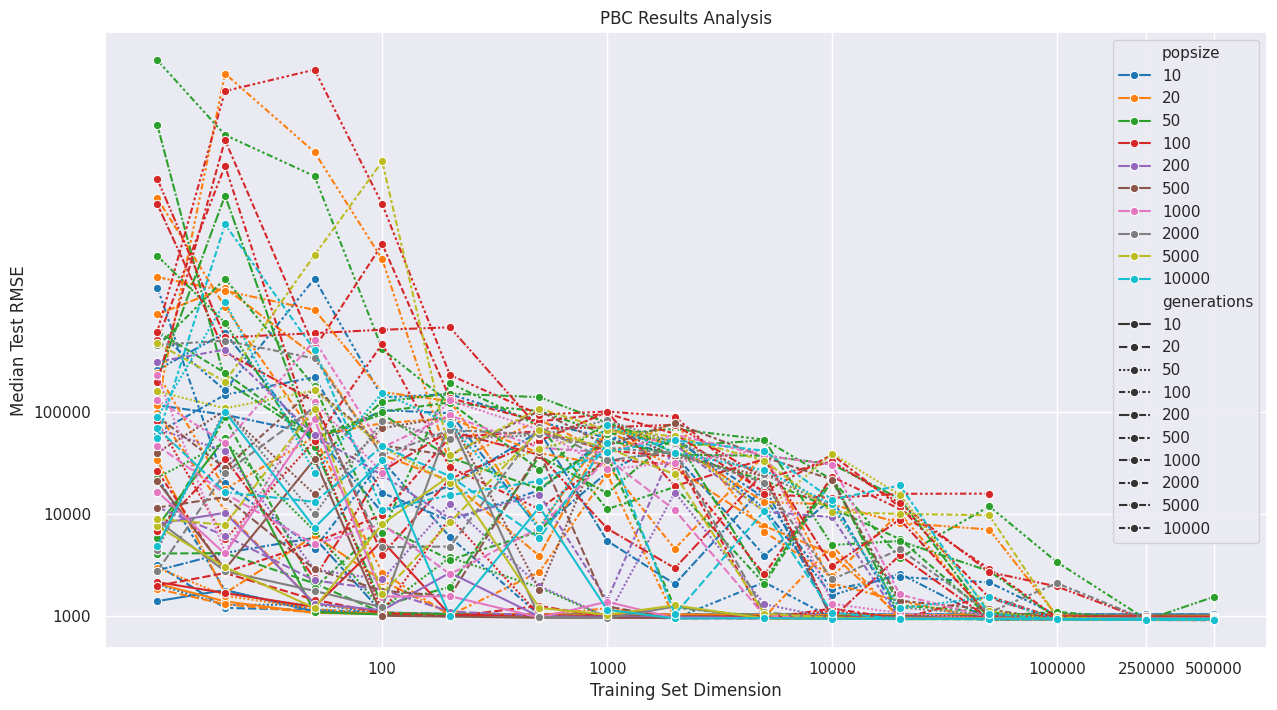

In [15]:
sns.set_theme(rc={'figure.figsize':(15,8)})
#sns.set_theme(style="darkgrid")

pbc_plot = sns.lineplot(data=median_pbc_dataframe, x='training_set_dimension', y='median_test_rmse', hue='popsize', style='generations', marker='o', errorbar=None, palette='tab10')
pbc_plot.set_xscale('log')
pbc_plot.set_yscale('log')
pbc_plot.set_title('PBC Results Analysis')
pbc_plot.set_xlabel('Training Set Dimension')
pbc_plot.set_ylabel('Median Test RMSE')
pbc_plot.set_xticks([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_xticklabels([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_yticks([0, 100, 1000, 10000, 100000])
pbc_plot.set_yticklabels([0, 100, 1000, 10000, 100000])
#pbc_plot.set_xlim(100)
#pbc_plot.set_ylim(0, 100000)

pbc_plot.plot()

In [12]:
def callback_scatter_plot(plt, coxnet_n_features_list, coxnet_errors_list, nsgp_n_features_list, nsgp_errors_list):
    fig, ax = plt.subplots(figsize=(7, 7), layout='constrained')

    coxnet_points = list(zip(coxnet_errors_list, coxnet_n_features_list))
    nsgp_points = list(zip(nsgp_errors_list, nsgp_n_features_list))

    for err, size in coxnet_points:
        # green
        ax.scatter(err, size, c='#31AB0C', marker='o', s=100, edgecolor='black', linewidth=0.8)

    for err, size in nsgp_points:
        # blue
        ax.scatter(err, size, c='#283ADF', marker='v', s=100, edgecolor='black', linewidth=0.8)

    ax.set_ylim(0, 21)
    ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
    ax.set_xlim(-1.0, -0.0)
    ax.set_xticks([-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1])
    ax.tick_params(axis='both', which='both', reset=False, bottom=False, top=False, left=False, right=False)
    ax.set_xlabel('Error')
    ax.set_ylabel('Number of Features')
    # ax.set_title(f'Methods Pareto Front ({metric} across all datasets and repetitions)')
    ax.grid(True, axis='both', which='major', color='gray', linestyle='--', linewidth=0.5)


def scatter_plot(
        dataset,
        seed,
        split_type,
        coxnet_n_features_list,
        coxnet_errors_list,
        nsgp_n_features_list,
        nsgp_errors_list
):
    PLOT_ARGS = {'rcParams': {'text.latex.preamble': r'\usepackage{amsmath}'}}

   # preamble = r'''
    #    \usepackage{amsmath}
     #   \usepackage{libertine}
      #  '''

    #PLOT_ARGS = {'rcParams': {'text.latex.preamble': preamble, 'pdf.fonttype': 42, 'ps.fonttype': 42}}

    #fastplot.plot(
    #    None, f'pareto_{dataset}_{split_type}_seed{seed}.pdf',
    #    mode='callback',
    #    callback=lambda plt: callback_scatter_plot(plt, coxnet_n_features_list, coxnet_errors_list, nsgp_n_features_list, nsgp_errors_list),
    #    style='latex', **PLOT_ARGS
    #)

In [6]:
median_pbc_dataframe = median_dataframe(pbc_dataframe)
median_pharynx_dataframe = median_dataframe(pharynx_dataframe)
median_poker_dataframe = median_dataframe(poker_dataframe)

In [20]:
def callback_lineplot(plt, dataframe):
    import matplotlib.cm as cm

    grouped = dataframe.groupby('popsize')

    num_populations = len(grouped)
    fig, axes = plt.subplots(num_populations, 1, figsize=(10, 5 * num_populations), constrained_layout=True)

    if num_populations == 1:
        axes = [axes]

    colormap = cm.get_cmap('rainbow')

    for (popsize, group), ax in zip(grouped, axes):
        generations = group['generations'].unique()
        for i, gen in enumerate(generations):
            gen_data = group[group['generations'] == gen]
            color = colormap(i / len(generations))
            ax.plot(gen_data['training_set_dimension'], gen_data['median_test_rmse'], marker='o', label=f'Generation {gen}', color=color)
        
        ax.set_title(f'RMSE for Popsize {popsize}')
        ax.set_xlabel('Training Set Dimension')
        ax.set_ylabel('RMSE')
        ax.set_xscale('log')
        ax.set_yscale('log')
        #ax.set_xticks([0, 100, 1000, 10000, 100000, 250000, 500000])
        #ax.set_yticks([0, 100, 1000, 10000, 100000])
        ax.legend()

In [ ]:
import matplotlib.pyplot as plt
import fastplot

PLOT_ARGS = {'rcParams': {'text.latex.preamble': r'\usepackage{amsmath}'}}
fastplot.plot(None, f'lineplot_pbc.pdf', mode='callback', callback=lambda plt: callback_lineplot(plt, median_pbc_dataframe), style='latex', **PLOT_ARGS)
fastplot.plot(None, f'lineplot_pharynx.pdf', mode='callback', callback=lambda plt: callback_lineplot(plt, median_pharynx_dataframe), style='latex', **PLOT_ARGS)
fastplot.plot(None, f'lineplot_poker.pdf', mode='callback', callback=lambda plt: callback_lineplot(plt, median_poker_dataframe), style='latex', **PLOT_ARGS)

[]

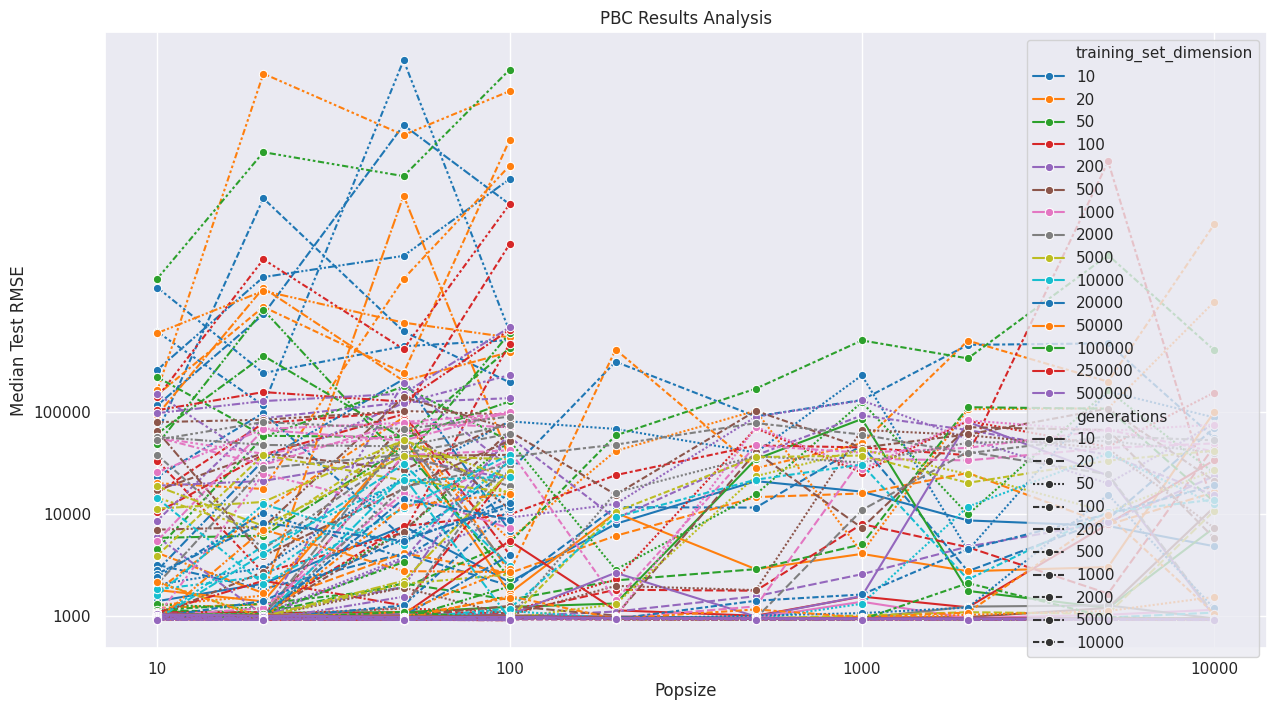

In [16]:
sns.set_theme(rc={'figure.figsize':(15,8)})
#sns.set_theme(style="darkgrid")

pbc_plot = sns.lineplot(data=median_pbc_dataframe, x='popsize', y='median_test_rmse', hue='training_set_dimension', style='generations', marker='o', errorbar=None, palette='tab10')
pbc_plot.set_xscale('log')
pbc_plot.set_yscale('log')
pbc_plot.set_title('PBC Results Analysis')
pbc_plot.set_xlabel('Popsize')
pbc_plot.set_ylabel('Median Test RMSE')
pbc_plot.set_xticks([0, 10, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_xticklabels([0, 10, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_yticks([0, 100, 1000, 10000, 100000])
pbc_plot.set_yticklabels([0, 100, 1000, 10000, 100000])
#pbc_plot.set_xlim(100)
#pbc_plot.set_ylim(0, 100000)

pbc_plot.plot()

[]

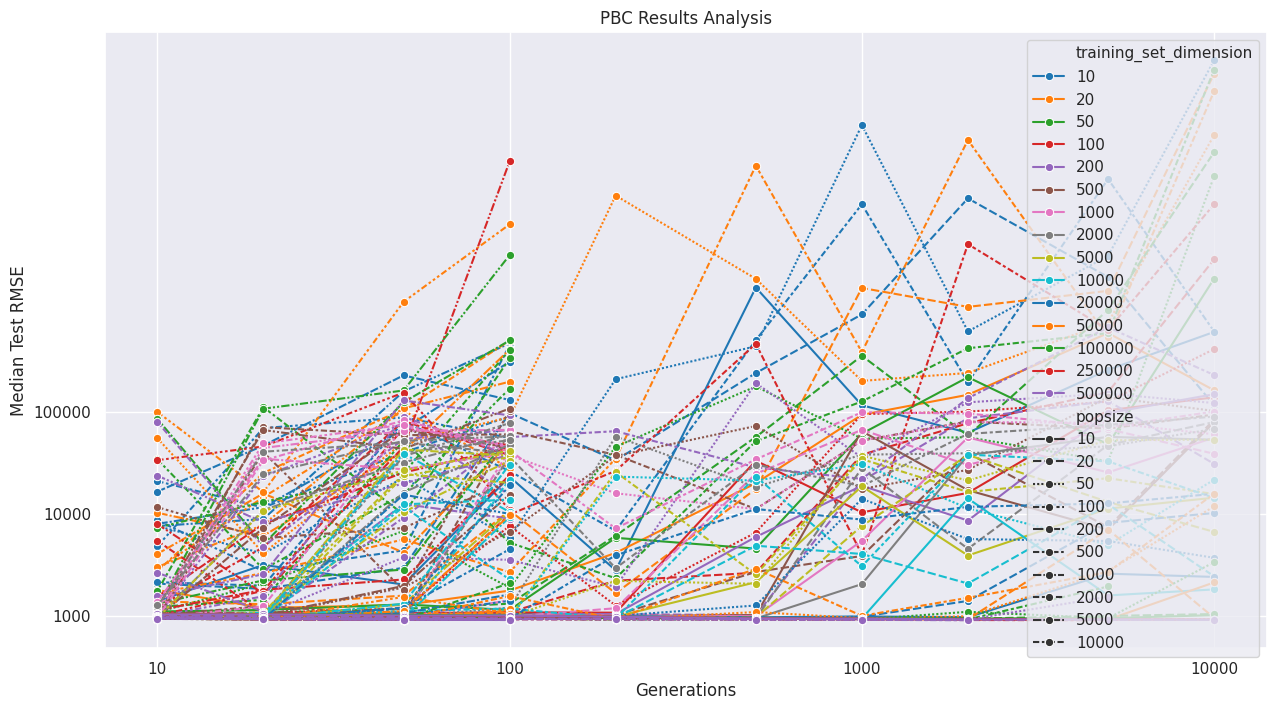

In [17]:
sns.set_theme(rc={'figure.figsize':(15,8)})
#sns.set_theme(style="darkgrid")

pbc_plot = sns.lineplot(data=median_pbc_dataframe, x='generations', y='median_test_rmse', hue='training_set_dimension', style='popsize', marker='o', errorbar=None, palette='tab10')
pbc_plot.set_xscale('log')
pbc_plot.set_yscale('log')
pbc_plot.set_title('PBC Results Analysis')
pbc_plot.set_xlabel('Generations')
pbc_plot.set_ylabel('Median Test RMSE')
pbc_plot.set_xticks([0, 10, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_xticklabels([0, 10, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_yticks([0, 100, 1000, 10000, 100000])
pbc_plot.set_yticklabels([0, 100, 1000, 10000, 100000])
#pbc_plot.set_xlim(100)
#pbc_plot.set_ylim(0, 100000)

pbc_plot.plot()

Ci sono meno punti perchè seaborn dovrebbe fare la media dei punti

Text(0.5, 1.0, 'Generations')

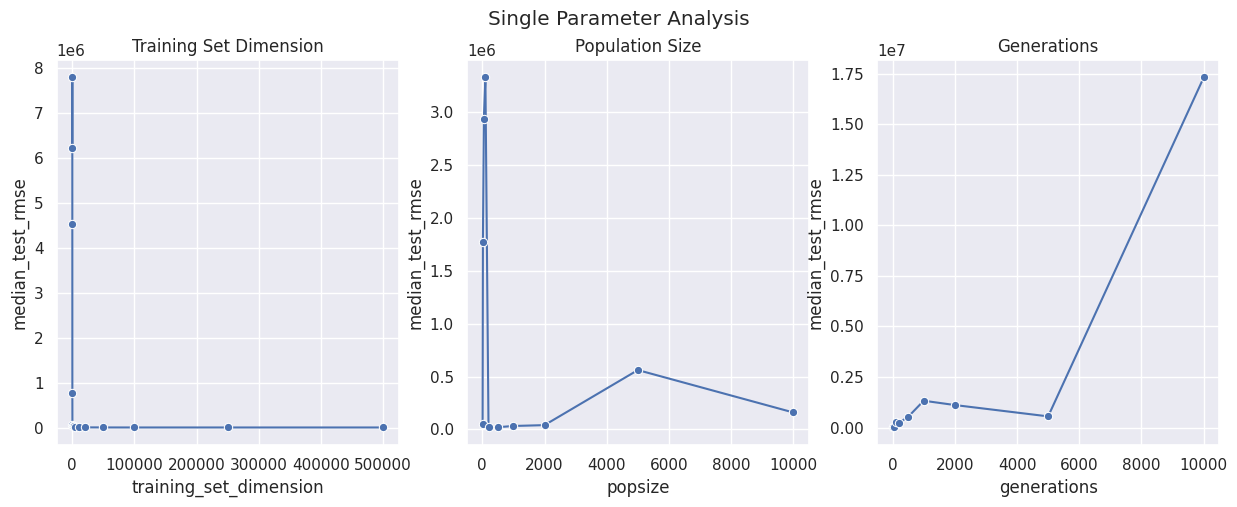

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Single Parameter Analysis')

sns.lineplot(ax=axes[0], data=median_pbc_dataframe, x='training_set_dimension', y='median_test_rmse', marker='o', errorbar=None)
axes[0].set_title('Training Set Dimension')

sns.lineplot(ax=axes[1], data=median_pbc_dataframe, x='popsize', y='median_test_rmse', marker='o', errorbar=None)
axes[1].set_title('Population Size')

sns.lineplot(ax=axes[2], data=median_pbc_dataframe, x='generations', y='median_test_rmse', marker='o', errorbar=None)
axes[2].set_title('Generations')

Text(0.5, 1.0, 'Training Set Dimension x Generations')

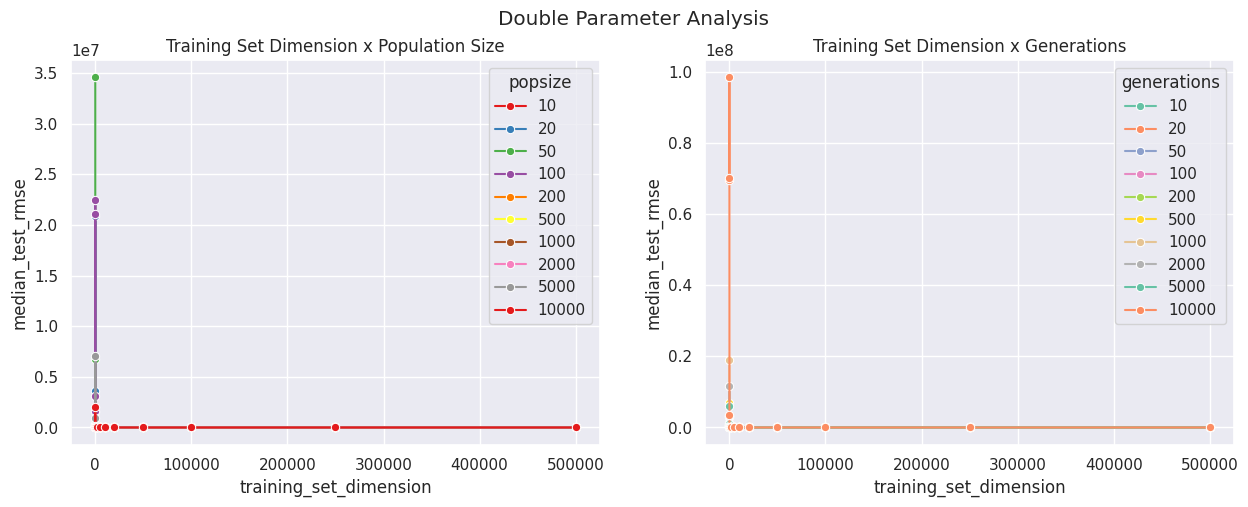

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Double Parameter Analysis')

sns.lineplot(ax=axes[0], data=median_pbc_dataframe, x='training_set_dimension', y='median_test_rmse', hue='popsize', marker='o', errorbar=None, palette='Set1')
axes[0].set_title('Training Set Dimension x Population Size')

sns.lineplot(ax=axes[1], data=median_pbc_dataframe, x='training_set_dimension', y='median_test_rmse', hue='generations', marker='o', errorbar=None, palette='Set2')
axes[1].set_title('Training Set Dimension x Generations')

Text(0.5, 1.0, 'Population Size x Training Set Dimension')

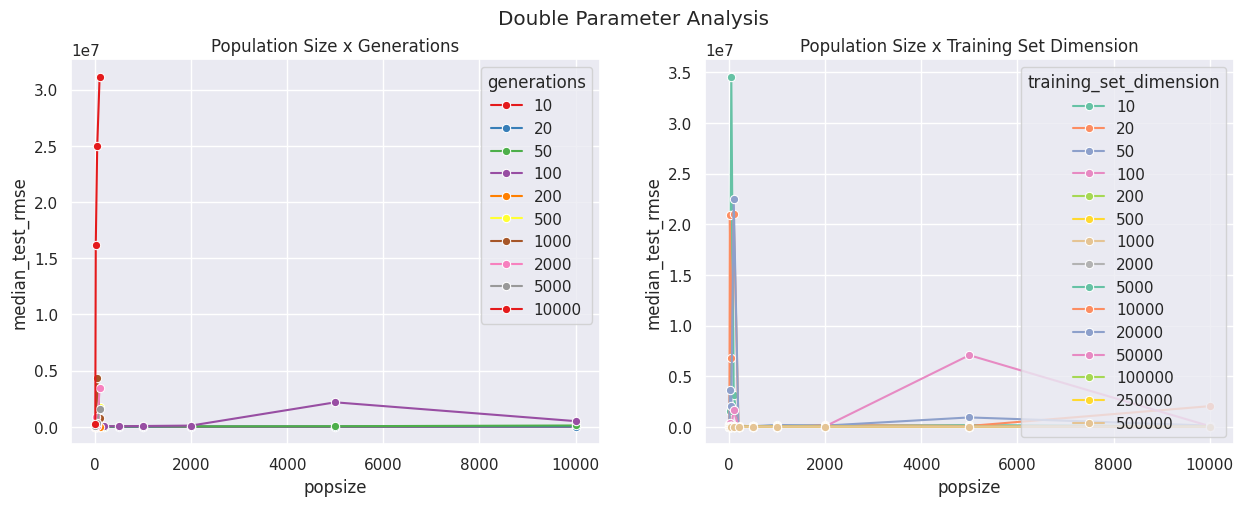

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Double Parameter Analysis')

sns.lineplot(ax=axes[0], data=median_pbc_dataframe, x='popsize', y='median_test_rmse', hue='generations', marker='o', errorbar=None, palette='Set1')
axes[0].set_title('Population Size x Generations')

sns.lineplot(ax=axes[1], data=median_pbc_dataframe, x='popsize', y='median_test_rmse', hue='training_set_dimension', marker='o', errorbar=None, palette='Set2')
axes[1].set_title('Population Size x Training Set Dimension')

Text(0.5, 1.0, 'Generations x Population Size')

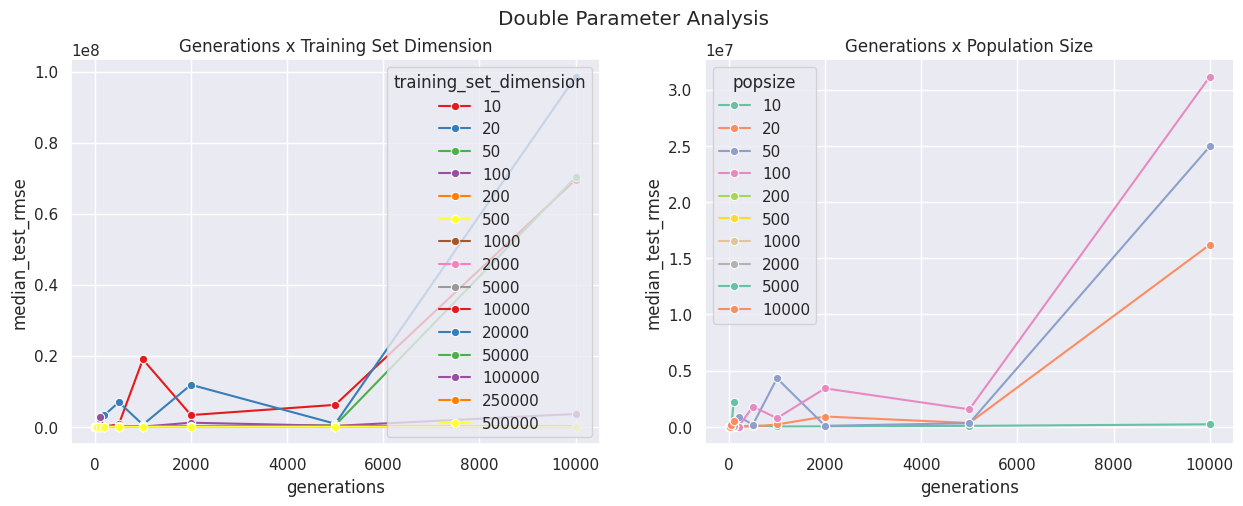

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Double Parameter Analysis')

sns.lineplot(ax=axes[0], data=median_pbc_dataframe, x='generations', y='median_test_rmse', hue='training_set_dimension', marker='o', errorbar=None, palette='Set1')
axes[0].set_title('Generations x Training Set Dimension')

sns.lineplot(ax=axes[1], data=median_pbc_dataframe, x='generations', y='median_test_rmse', hue='popsize', marker='o', errorbar=None, palette='Set2')
axes[1].set_title('Generations x Population Size')

<Figure size 1500x800 with 0 Axes>

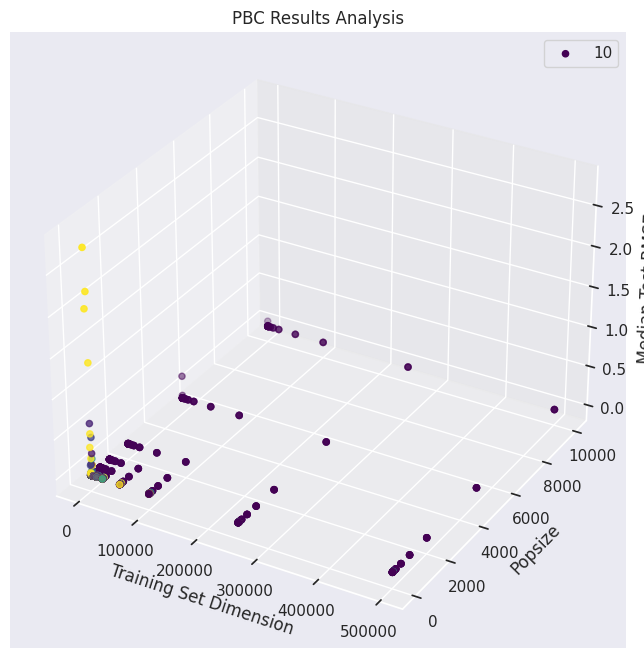

In [22]:
plt.figure(figsize=(15,8))
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(xs=median_pbc_dataframe['training_set_dimension'], ys=median_pbc_dataframe['popsize'], zs=median_pbc_dataframe['median_test_rmse'], c=median_pbc_dataframe['generations'], cmap='viridis')

ax.set_xlabel('Training Set Dimension')
ax.set_ylabel('Popsize')
ax.set_zlabel('Median Test RMSE')
ax.set_title('PBC Results Analysis')
ax.legend(pd.unique(median_pbc_dataframe['generations']))

plt.show()

In [23]:
median_pharynx_dataframe = median_dataframe(pharynx_dataframe)

[]

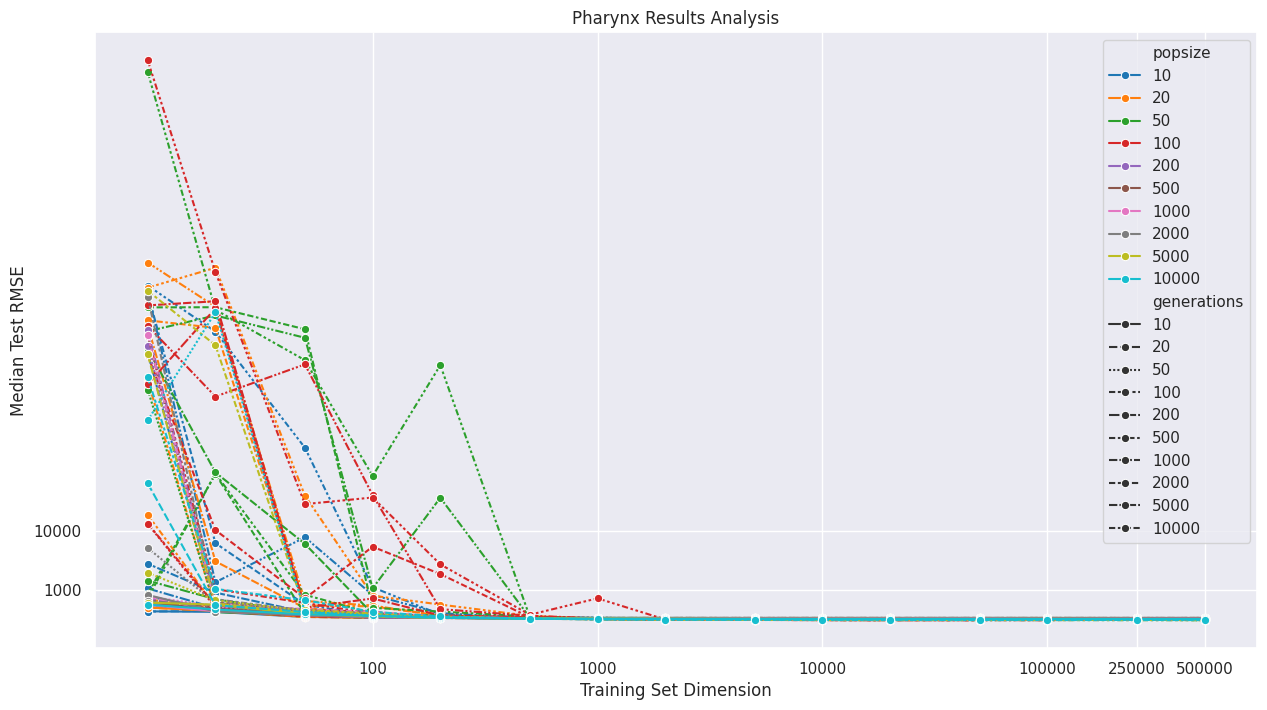

In [24]:
sns.set_theme(rc={'figure.figsize':(15,8)})
#sns.set_theme(style="darkgrid")

pbc_plot = sns.lineplot(data=median_pharynx_dataframe, x='training_set_dimension', y='median_test_rmse', hue='popsize', style='generations', marker='o', errorbar=None, palette='tab10')
pbc_plot.set_xscale('log')
pbc_plot.set_yscale('log')
pbc_plot.set_title('Pharynx Results Analysis')
pbc_plot.set_xlabel('Training Set Dimension')
pbc_plot.set_ylabel('Median Test RMSE')
pbc_plot.set_xticks([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_xticklabels([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_yticks([0, 100, 1000, 10000])
pbc_plot.set_yticklabels([0, 100, 1000, 10000])
#pbc_plot.set_xlim(100)
#pbc_plot.set_ylim(0, 100000)

pbc_plot.plot()


In [25]:
median_poker_dataframe = median_dataframe(poker_dataframe)

[]

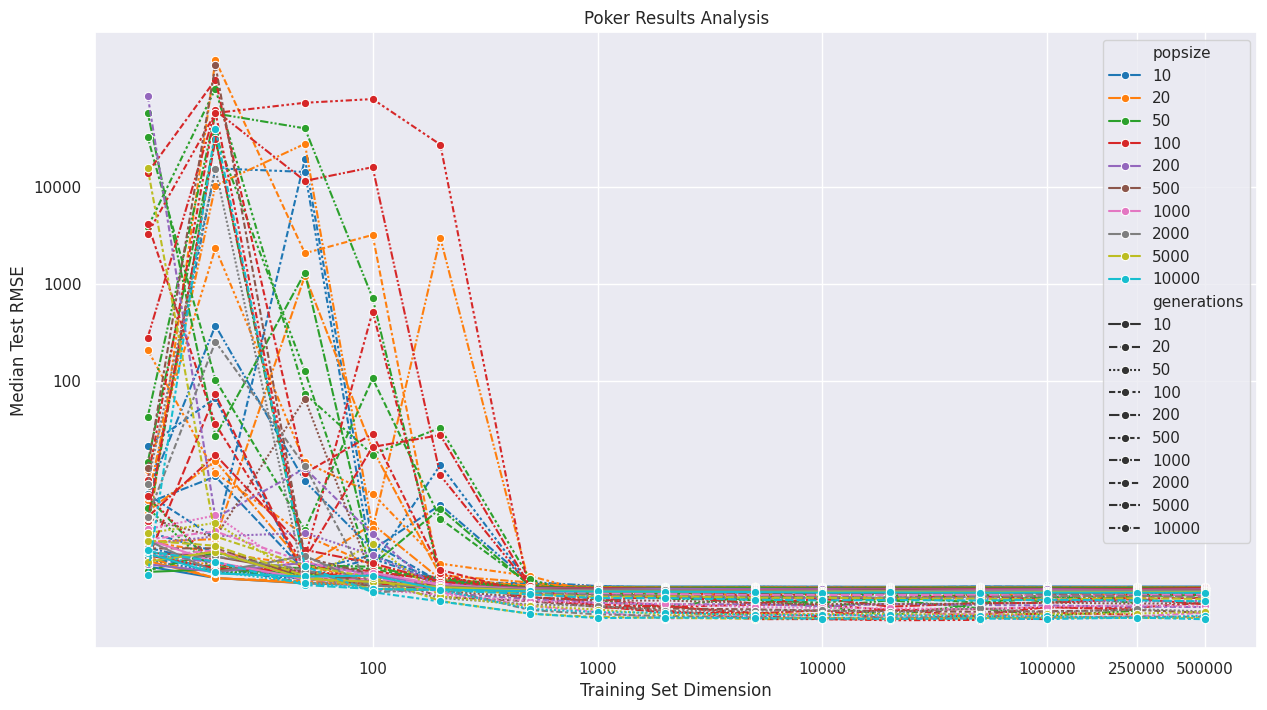

In [26]:
sns.set_theme(rc={'figure.figsize':(15,8)})
#sns.set_theme(style="darkgrid")

pbc_plot = sns.lineplot(data=median_poker_dataframe, x='training_set_dimension', y='median_test_rmse', hue='popsize', style='generations', marker='o', errorbar=None, palette='tab10')
pbc_plot.set_xscale('log')
pbc_plot.set_yscale('log')
pbc_plot.set_title('Poker Results Analysis')
pbc_plot.set_xlabel('Training Set Dimension')
pbc_plot.set_ylabel('Median Test RMSE')
pbc_plot.set_xticks([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_xticklabels([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_yticks([0, 100, 1000, 10000])
pbc_plot.set_yticklabels([0, 100, 1000, 10000])
#pbc_plot.set_xlim(100)
#pbc_plot.set_ylim(0, 100000)

pbc_plot.plot()
